In [80]:
import pandas as pd

In [81]:
sigla_uf = 'SP'

nome_arquivo = f'receitas_candidatos_2018_{sigla_uf}.csv'
url_arquivo = f'https://github.com/paulosalvatore/Ocean_Python_VisualizacaoDados_11_08_20/blob/master/receitas_candidatos/{nome_arquivo}?raw=true'

df = pd.read_csv(url_arquivo, sep=';', encoding='latin-1', decimal=',')

In [82]:
colunas = ['SQ_CANDIDATO', 'NM_CANDIDATO', 'VR_RECEITA']
df_filtrado = df[colunas]

In [83]:
len(df_filtrado.SQ_CANDIDATO.unique())

3239

In [84]:
len(df_filtrado.NM_CANDIDATO.unique())

3238

In [85]:
group = df_filtrado.groupby(['SQ_CANDIDATO', 'NM_CANDIDATO'])

group.SQ_CANDIDATO.count()

SQ_CANDIDATO  NM_CANDIDATO                
250000600365  ALEXSSANDER DE OLIVEIRA          8
250000600366  ALEX PAULO                       1
250000600371  ANTONIO RODRIGUES DE SOUSA      25
250000600372  APARECIDO SOUZA SANTOS          16
250000600373  BENEDITO AUGUSTO DOS SANTOS      1
                                              ..
250000629793  ANA DA SILVA FERNANDES           3
250000629824  CLAUDIO GASPAR DOTTORI           1
250000629825  UDÁRIO PIRES                     4
250000630002  ROBERTO FRANCISCO DA SILVA       4
250000630116  MARGARETE ANTUNES DOS SANTOS     2
Name: SQ_CANDIDATO, Length: 3239, dtype: int64

In [86]:
group_sum = group.VR_RECEITA.sum()

In [87]:
group.VR_RECEITA.dtype

SQ_CANDIDATO  NM_CANDIDATO                
250000600365  ALEXSSANDER DE OLIVEIRA         float64
250000600366  ALEX PAULO                      float64
250000600371  ANTONIO RODRIGUES DE SOUSA      float64
250000600372  APARECIDO SOUZA SANTOS          float64
250000600373  BENEDITO AUGUSTO DOS SANTOS     float64
                                               ...   
250000629793  ANA DA SILVA FERNANDES          float64
250000629824  CLAUDIO GASPAR DOTTORI          float64
250000629825  UDÁRIO PIRES                    float64
250000630002  ROBERTO FRANCISCO DA SILVA      float64
250000630116  MARGARETE ANTUNES DOS SANTOS    float64
Name: VR_RECEITA, Length: 3239, dtype: object

In [88]:
target = group_sum.nlargest(10)

target

SQ_CANDIDATO  NM_CANDIDATO                       
250000615141  MARCIO LUIZ FRANÇA GOMES               19995009.54
250000612596  JOÃO AGRIPINO DA COSTA DORIA JUNIOR    18716604.00
250000604077  PAULO ANTONIO SKAF                     10648708.64
250000623884  LUIZ MARINHO                            5937300.00
250000612593  MARA CRISTINA GABRILLI                  5327773.62
250000615143  MAURREN HIGA MAGGI                      3813831.00
250000615144  MARIO COVAS NETO                        2561309.32
250000605403  BRUNA DIAS FURLAN                       2507376.59
250000606247  MARCOS ANTONIO PEREIRA                  2496213.48
250000606294  MARIA DO PARTO MENDES ROSAS             2423442.36
Name: VR_RECEITA, dtype: float64

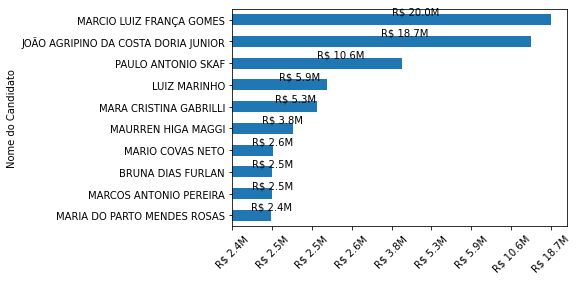

In [120]:
def formatar_valor(valor):
  return "R$ {:.1f}M".format(valor / 1000000)

import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(10, 10))

target_cleared = target.reset_index('SQ_CANDIDATO', drop=True).sort_values(ascending=True)

target_formatado = target_cleared.map(formatar_valor)

graph = target_cleared.plot.barh()

graph.set_ylabel('Nome do Candidato')
graph.set_xticklabels(target_formatado.values, rotation=45)

x_offset = 0
y_offset = 0
for i, p in enumerate(graph.patches):
    b = p.get_bbox()

    vr_receita = target_formatado.values[i]

    graph.annotate(vr_receita, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.show()